In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV 

%matplotlib inline

C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [3]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [3]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

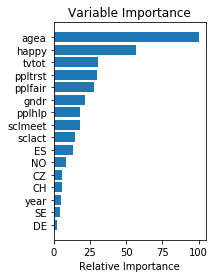

In [4]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

# Challenge
___
## Exploration

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [6]:
df.shape

(8147, 13)

C:\Users\Loren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


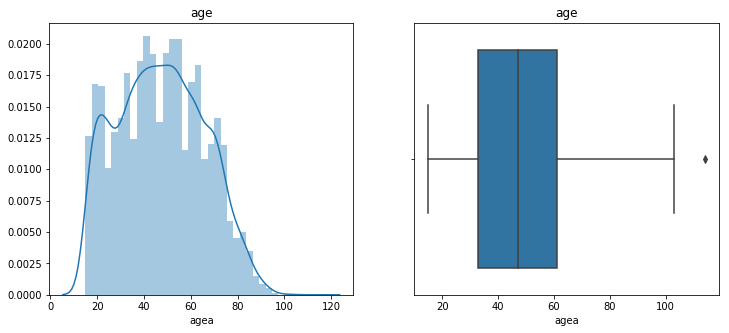

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['agea'])
plt.title('age')

plt.subplot(1, 2, 2)
sns.boxplot(df['agea'])
plt.title('age')

plt.show()

C:\Users\Loren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


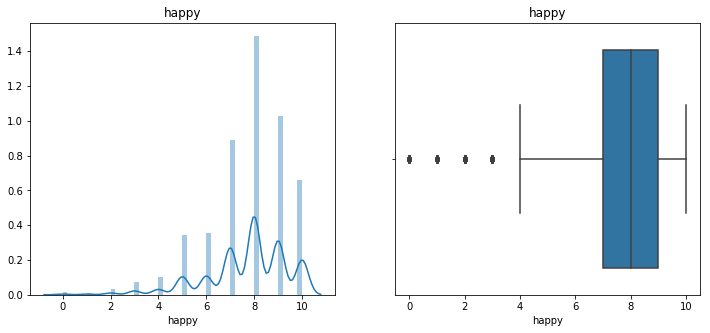

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['happy'])
plt.title('happy')

plt.subplot(1, 2, 2)
sns.boxplot(df['happy'])
plt.title('happy')

plt.show()

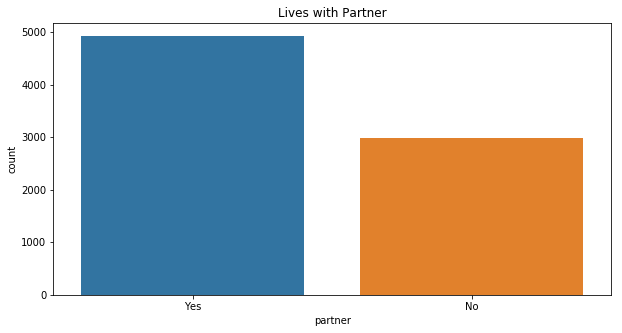

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x="partner", data=df);
plt.xticks(np.arange(2),('Yes', 'No'))
plt.title('Lives with Partner')
plt.show()

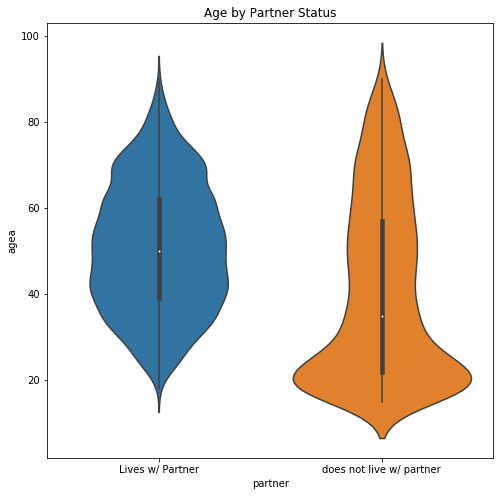

In [42]:
plt.figure(figsize=(8,8))

sns.violinplot(x="partner",y="agea", data=df)
plt.title('Age by Partner Status')
plt.xticks(np.arange(2),('Lives w/ Partner', 'does not live w/ partner'))
plt.show()

## Remove outliers

In [4]:
# Remove all respondents above 90
df = df[df['agea'] <= 90]
# remove people that reported 3 or less on happy
df = df[df['happy'] >= 4]

In [5]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
y.value_counts()
len(y[y == 0.0]) / len(y)

0.6228969006957622

#### Benchmark of .623

## Tuning 

In [36]:
# Find number of estimators
param_test1 = {'n_estimators':np.arange(1, 200)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [37]:
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.66186, std: 0.01760, params: {'n_estimators': 1},
  mean: 0.72216, std: 0.02175, params: {'n_estimators': 2},
  mean: 0.73926, std: 0.02583, params: {'n_estimators': 3},
  mean: 0.74854, std: 0.03303, params: {'n_estimators': 4},
  mean: 0.76082, std: 0.02351, params: {'n_estimators': 5},
  mean: 0.76294, std: 0.02452, params: {'n_estimators': 6},
  mean: 0.76488, std: 0.02302, params: {'n_estimators': 7},
  mean: 0.76730, std: 0.02366, params: {'n_estimators': 8},
  mean: 0.77018, std: 0.02328, params: {'n_estimators': 9},
  mean: 0.77098, std: 0.02417, params: {'n_estimators': 10},
  mean: 0.77235, std: 0.02488, params: {'n_estimators': 11},
  mean: 0.77335, std: 0.02452, params: {'n_estimators': 12},
  mean: 0.77462, std: 0.02425, params: {'n_estimators': 13},
  mean: 0.77532, std: 0.02390, params: {'n_estimators': 14},
  mean: 0.77525, std: 0.02384, params: {'n_estimators': 15},
  mean: 0.77621, std: 0.02415, params: {'n_estimators': 16},
  mean: 0.77695, std: 0.02463, pa

### 105 estimators has the highest accuracy at .7857 and a std of  .02163

#### Tuning max depth and min_samples_split

In [45]:
param_test2 = {'max_depth': np.arange(2,16), 'min_samples_split': np.arange(200,1001,100)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=105, min_samples_leaf=50, max_features='sqrt', subsample=0.8), 
param_grid = param_test2, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

In [46]:
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.78103, std: 0.02279, params: {'max_depth': 2, 'min_samples_split': 200},
  mean: 0.78153, std: 0.02267, params: {'max_depth': 2, 'min_samples_split': 300},
  mean: 0.78126, std: 0.02314, params: {'max_depth': 2, 'min_samples_split': 400},
  mean: 0.78086, std: 0.02273, params: {'max_depth': 2, 'min_samples_split': 500},
  mean: 0.78116, std: 0.02303, params: {'max_depth': 2, 'min_samples_split': 600},
  mean: 0.78008, std: 0.02371, params: {'max_depth': 2, 'min_samples_split': 700},
  mean: 0.78142, std: 0.02170, params: {'max_depth': 2, 'min_samples_split': 800},
  mean: 0.78063, std: 0.02281, params: {'max_depth': 2, 'min_samples_split': 900},
  mean: 0.78186, std: 0.02179, params: {'max_depth': 2, 'min_samples_split': 1000},
  mean: 0.78677, std: 0.02225, params: {'max_depth': 4, 'min_samples_split': 200},
  mean: 0.78593, std: 0.02244, params: {'max_depth': 4, 'min_samples_split': 300},
  mean: 0.78677, std: 0.02067, params: {'max_depth': 4, 'min_samples_split': 400},
  m

### max_depth of 4 and min_samples_split of 400 yielded the best accuracy of .78677 and a std of 0.02067

### Trying more values for min_samples_split along with different values for min_samples_leaf with a max_depth of 4. 

In [6]:
param_test3 = {'min_samples_leaf': np.arange(20,71,10), 'min_samples_split': np.arange(300,500,20)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=105, max_depth=4, max_features='sqrt', subsample=0.8), 
param_grid = param_test3, scoring='roc_auc', n_jobs=4, iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.78599, std: 0.02100, params: {'min_samples_leaf': 20, 'min_samples_split': 300},
  mean: 0.78469, std: 0.02033, params: {'min_samples_leaf': 20, 'min_samples_split': 320},
  mean: 0.78467, std: 0.02154, params: {'min_samples_leaf': 20, 'min_samples_split': 340},
  mean: 0.78565, std: 0.01987, params: {'min_samples_leaf': 20, 'min_samples_split': 360},
  mean: 0.78591, std: 0.01946, params: {'min_samples_leaf': 20, 'min_samples_split': 380},
  mean: 0.78526, std: 0.02076, params: {'min_samples_leaf': 20, 'min_samples_split': 400},
  mean: 0.78630, std: 0.02148, params: {'min_samples_leaf': 20, 'min_samples_split': 420},
  mean: 0.78564, std: 0.01890, params: {'min_samples_leaf': 20, 'min_samples_split': 440},
  mean: 0.78539, std: 0.01935, params: {'min_samples_leaf': 20, 'min_samples_split': 460},
  mean: 0.78360, std: 0.02169, params: {'min_samples_leaf': 20, 'min_samples_split': 480},
  mean: 0.78283, std: 0.01906, params: {'min_samples_leaf': 30, 'min_samples_split': 300},

#### min_sample_leaf = 40 and min_sample_split = 460 had the best accuracy of .78766

### fine the optimum max_features

In [10]:
param_test4 = {'max_features':np.arange(2,17,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=105,max_depth=4, min_samples_split=460, min_samples_leaf=40, subsample=0.8),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.78166, std: 0.02077, params: {'max_features': 2},
  mean: 0.78549, std: 0.02040, params: {'max_features': 4},
  mean: 0.78794, std: 0.02214, params: {'max_features': 6},
  mean: 0.78612, std: 0.02174, params: {'max_features': 8},
  mean: 0.78710, std: 0.02042, params: {'max_features': 10},
  mean: 0.78625, std: 0.02107, params: {'max_features': 12},
  mean: 0.78701, std: 0.02060, params: {'max_features': 14},
  mean: 0.78627, std: 0.02111, params: {'max_features': 16}],
 {'max_features': 6},
 0.7879371886012853)

#### Max features of 6 has the highest accuracy of .7879


### Checking the crosstab table 

In [13]:
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# Initialize and fit the model.
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=105,max_depth=4, min_samples_split=460, min_samples_leaf=40, subsample=0.8)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04343547933651954
Percent Type II errors: 0.1771155468091088

Test set accuracy:
Percent Type I errors: 0.05815423514538559
Percent Type II errors: 0.1959544879898862


### Trying different subsamples

In [12]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95,1]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=105,max_depth=4,min_samples_split=400, min_samples_leaf=60, subsample=0.8,max_features=6),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.78579, std: 0.01863, params: {'subsample': 0.6},
  mean: 0.78608, std: 0.01972, params: {'subsample': 0.7},
  mean: 0.78616, std: 0.02187, params: {'subsample': 0.75},
  mean: 0.78726, std: 0.02129, params: {'subsample': 0.8},
  mean: 0.78646, std: 0.02112, params: {'subsample': 0.85},
  mean: 0.78697, std: 0.02018, params: {'subsample': 0.9},
  mean: 0.78502, std: 0.02127, params: {'subsample': 0.95},
  mean: 0.78844, std: 0.02201, params: {'subsample': 1}],
 {'subsample': 1},
 0.7884404527168211)

### I'll stick with a subsample of .8 to avoid over-fitting

### Trying an 'exponential' loss function

In [15]:
clf = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=105,max_depth=4, min_samples_split=460, min_samples_leaf=40, subsample=.8)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04231093618217599
Percent Type II errors: 0.1803486083778465

Test set accuracy:
Percent Type I errors: 0.05941845764854614
Percent Type II errors: 0.19469026548672566


### Trying reducing the learning rate to .5 and increasing the number of trees to 210

In [18]:
clf = GradientBoostingClassifier(loss='exponential', learning_rate=0.5, n_estimators=210,max_depth=4, min_samples_split=460, min_samples_leaf=40, subsample=.8)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04301377565364071
Percent Type II errors: 0.13494517852122576

Test set accuracy:
Percent Type I errors: 0.07838179519595449
Percent Type II errors: 0.20480404551201012


#### decreasing the learning rate is just leading to over-fitting.

#### Overall, the percent of errors was not improved upon. 